# Naive Bayes

##### source dataset: https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity 

##### Import Libary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

##### Import dataset

In [ ]:
dataset = pd.read_csv('social_media_vs_productivity.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 9].values

##### Convert data Gender [1] di dalam variable X

In [27]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [28]:
y

array([4., 7., 4., ..., 5., 8., 3.], shape=(30000,))

In [29]:
X

array([[56, 1],
       [46, 1],
       [32, 1],
       ...,
       [42, 1],
       [20, 0],
       [44, 1]], shape=(30000, 2), dtype=object)

##### Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
X_test

array([[27, 1],
       [30, 0],
       [27, 0],
       ...,
       [23, 0],
       [64, 0],
       [18, 0]], shape=(7500, 2), dtype=object)

In [32]:
y_test

array([ 7., 10.,  3., ...,  6.,  1.,  4.], shape=(7500,))

##### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train

array([[ 0.98094955,  0.77013867],
       [ 1.48810741,  0.77013867],
       [-0.46807289,  0.77013867],
       ...,
       [-0.10581728, -0.98674261],
       [ 0.25643833,  0.77013867],
       [ 0.69114506,  0.77013867]], shape=(22500, 2))

In [35]:
y_test

array([ 7., 10.,  3., ...,  6.,  1.,  4.], shape=(7500,))

# Training the Naive Bayes model on the Training set

In [42]:
from sklearn.naive_bayes import GaussianNB

mask = ~np.isnan(y_train)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

classifier = GaussianNB()
classifier.fit(X_train_clean, y_train_clean)

GaussianNB()

# Predicting the Test set results

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
y_pred

array([ 6., 10., 10., ..., 10.,  7., 10.], shape=(7500,))

In [45]:
y_test

array([ 7., 10.,  3., ...,  6.,  1.,  4.], shape=(7500,))

# Making the Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]
cm = confusion_matrix(y_test_clean, y_pred_clean)
print(cm)

[[  0   0   0  75  38 156 146   0   7 261]
 [  0   0   0 100  36 163 180   0   5 238]
 [  0   0   0  87  53 170 122   0  10 256]
 [  0   0   0  83  45 155 152   0   6 272]
 [  0   0   0  98  38 178 142   0   7 234]
 [  0   0   0  80  34 184 128   0  10 245]
 [  0   0   0  89  30 155 144   0   6 263]
 [  0   0   0  97  26 172 156   0  13 245]
 [  0   0   0  85  35 170 150   0   4 250]
 [  0   0   0  95  39 166 153   0   5 241]]


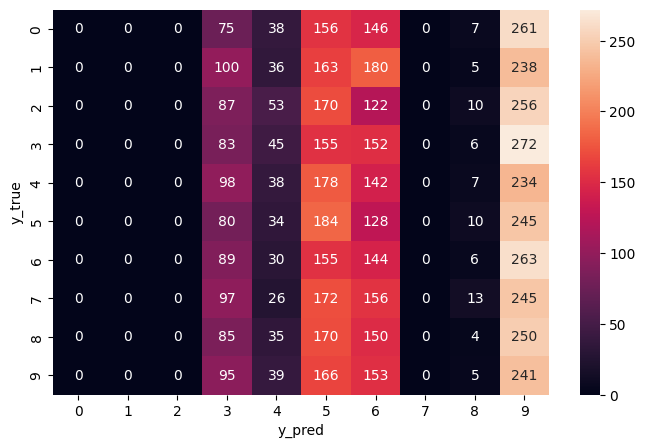

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
from sklearn.metrics import classification_report
print (classification_report(y_test_clean, y_pred_clean))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       683
         2.0       0.00      0.00      0.00       722
         3.0       0.00      0.00      0.00       698
         4.0       0.09      0.12      0.10       713
         5.0       0.10      0.05      0.07       697
         6.0       0.11      0.27      0.16       681
         7.0       0.10      0.21      0.13       687
         8.0       0.00      0.00      0.00       709
         9.0       0.05      0.01      0.01       694
        10.0       0.10      0.34      0.15       699

    accuracy                           0.10      6983
   macro avg       0.06      0.10      0.06      6983
weighted avg       0.06      0.10      0.06      6983



C:\Users\RESTU ARDIANSYAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RESTU ARDIANSYAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RESTU ARDIANSYAH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

# Visualising the Training set results 

C:\Users\RESTU ARDIANSYAH\AppData\Local\Temp\ipykernel_14512\195803783.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


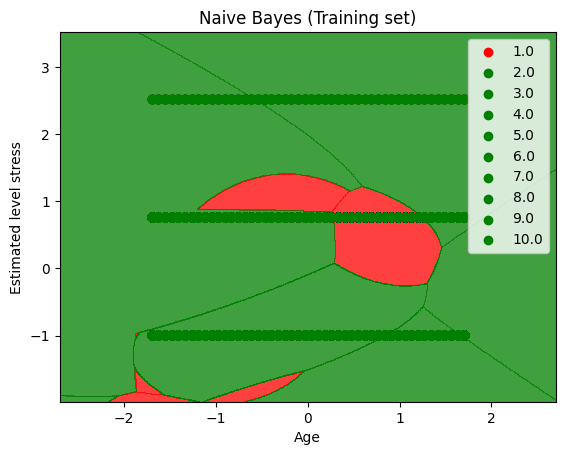

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_clean, y_train_clean
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated level stress')
plt.legend()
plt.show()